# Numerical exercise 01


In [66]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from scipy.stats import norm, cauchy

## Exercise 01.1

#### Assignment
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties).
2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties).
3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... but before judging, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

### Resolution
To veify the goodness of the provided random number generator, we can compute the average value of the generated numbers. We expect from a uniform distribution spanning over $[0,1)$ an average value of $\langle r \rangle = \int_0^1 r dr = 1/2$.

To compute the average value we leverage the blocking method: given $M$ random numbers, we divide them into $N$ blocks of size $L = M/N$. We then compute the average of each block and the average of the averages.
This method gives us the possibility to extimate the uncertainty of the average value, by using the standard deviation of the mean value.
The statistical uncertainity up to the $n$-th block is given by:
$$
\sigma_{\langle r \rangle} = \sqrt{\frac{1}{n} \left( \langle r^2 \rangle - \langle r \rangle^2 \right)}
$$
where
$$
\langle r^2 \rangle \simeq \frac{1}{n} \sum_{i=1}^n r^2_i \quad \quad \langle r\rangle^2 \simeq \left( \frac{1}{n} \sum_{i=1}^n r_i \right)^2
$$
We expect the uncertainty to decrease as $\sqrt{N}$.



Values chosen for the data blocking are $M = 10^6$ and $N = 100$.

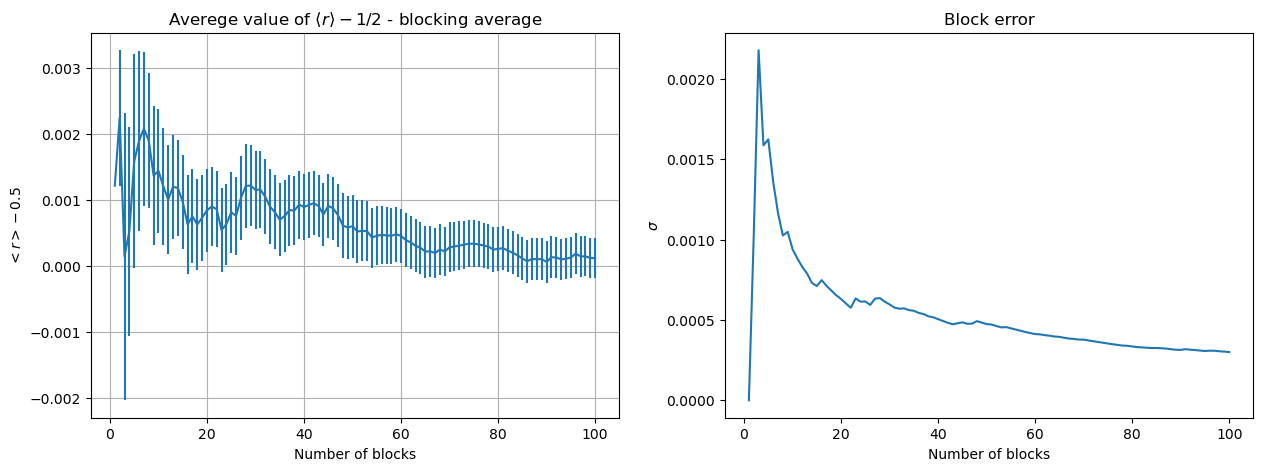

In [67]:
n_throws, cum_avg, block_error = np.loadtxt("../data/ex01_1a.dat", unpack=True, usecols=(0,1,2))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.errorbar(n_throws, cum_avg-0.5, yerr=block_error)
plt.title(r"Averege value of $\langle r \rangle - 1/2$ - blocking average")
plt.xlabel('Number of blocks')
plt.ylabel(r"$<r>-0.5$")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(n_throws, block_error)

plt.title("Block error")
plt.xlabel('Number of blocks')
plt.ylabel(r"$\sigma$")


plt.show()

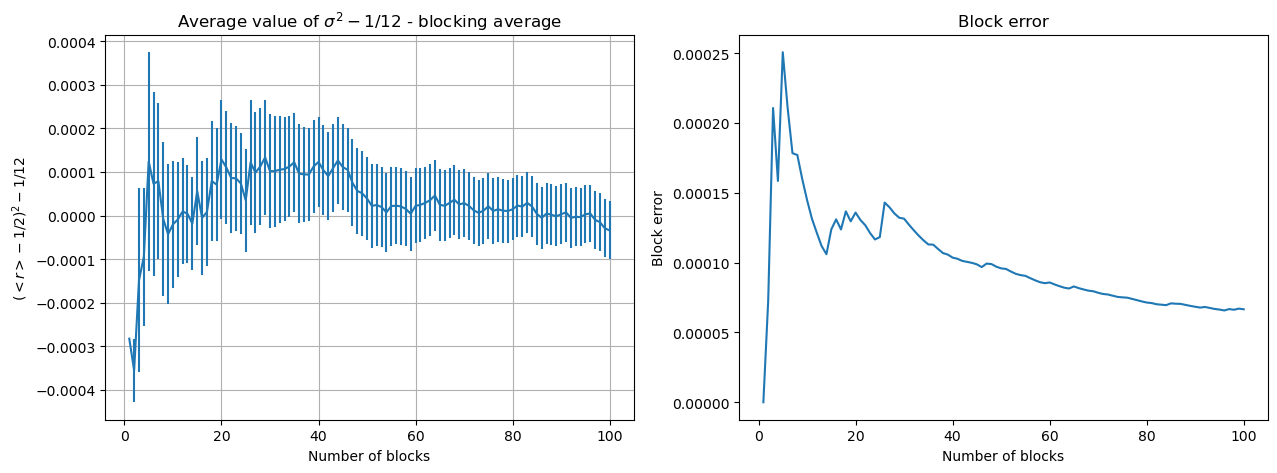

In [68]:
vn_throws, vcum_avg, vblock_error = np.loadtxt("../data/ex01_1b.dat", unpack=True, usecols=(0,1,2))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.errorbar(vn_throws, vcum_avg-1/12, yerr=vblock_error)
plt.title(r"Average value of $\sigma^2 - 1/12$ - blocking average")
plt.xlabel('Number of blocks')
plt.ylabel(r"$(<r>-1/2)^2 - 1/12$")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(vn_throws, vblock_error)
plt.title("Block error")

plt.xlabel('Number of blocks')
plt.ylabel('Block error')

plt.show()



#### $\chi^2$ test
We can implement a $\chi^2$ test to verify that the extracted random numbers are indeed random incoming from an uniform distribution.
The code extracts $M = 10^4$ numbers and counts how many of them falls in each of the $M = 100$ sub-intervals of $[0,1]$.
We can the plot the $\chi^2$ value for each of the $100$ extractions, and realizes an histogram of the values.
Looking at the plotted values, we can see that the points are distributed around the expected value of $100$.

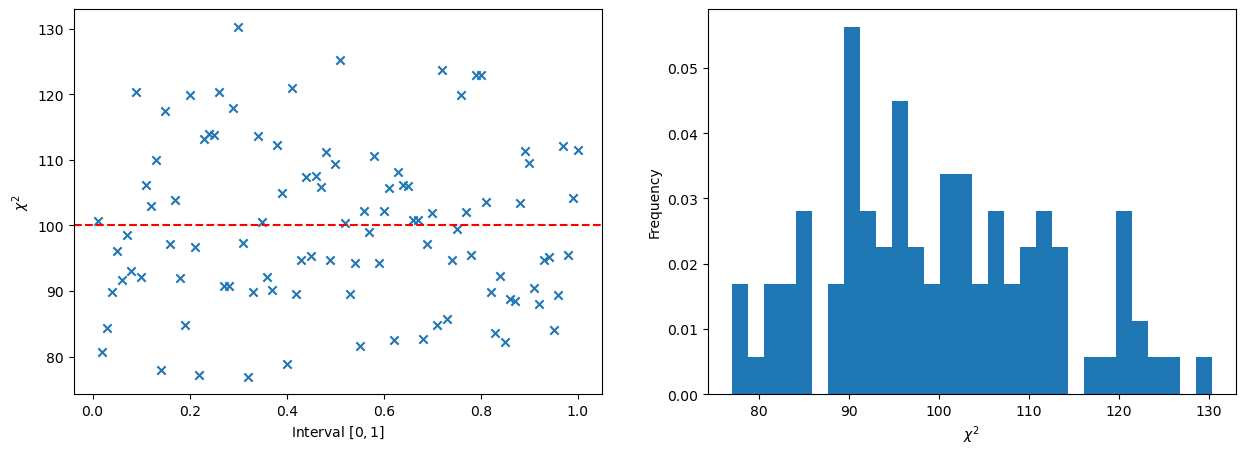

Mean = 99.80, std = 12.36


In [69]:
point, chi2 = np.loadtxt("../data/ex01_1c.dat", unpack=True, usecols=(0,1))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(point*(1/100), chi2, marker="x")
plt.axhline(y=100, color='r', linestyle='--')
plt.xlabel(r"Interval $[0,1]$")
plt.ylabel(r"$\chi^2$")

plt.subplot(1,2,2)
plt.hist(chi2, 30, density=True)
plt.xlabel(r"$\chi^2$")
plt.ylabel("Frequency")
plt.show()

print("Mean = {0:.2f}, std = {1:.2f}".format(chi2.mean(), chi2.std()))


## Exercise 01.2

#### Assignment
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:
1. Add two probability distributions by using the **method of the inversion of the cumulative distribution** to sample from a **generic** exponential distribution, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

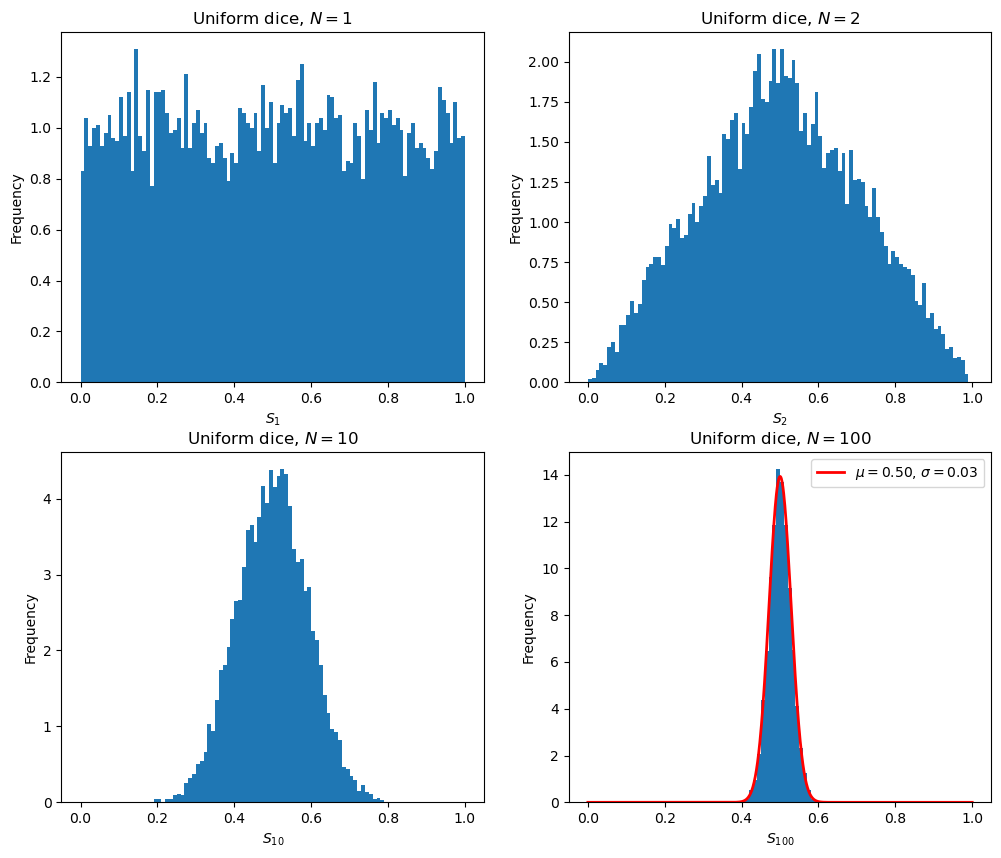

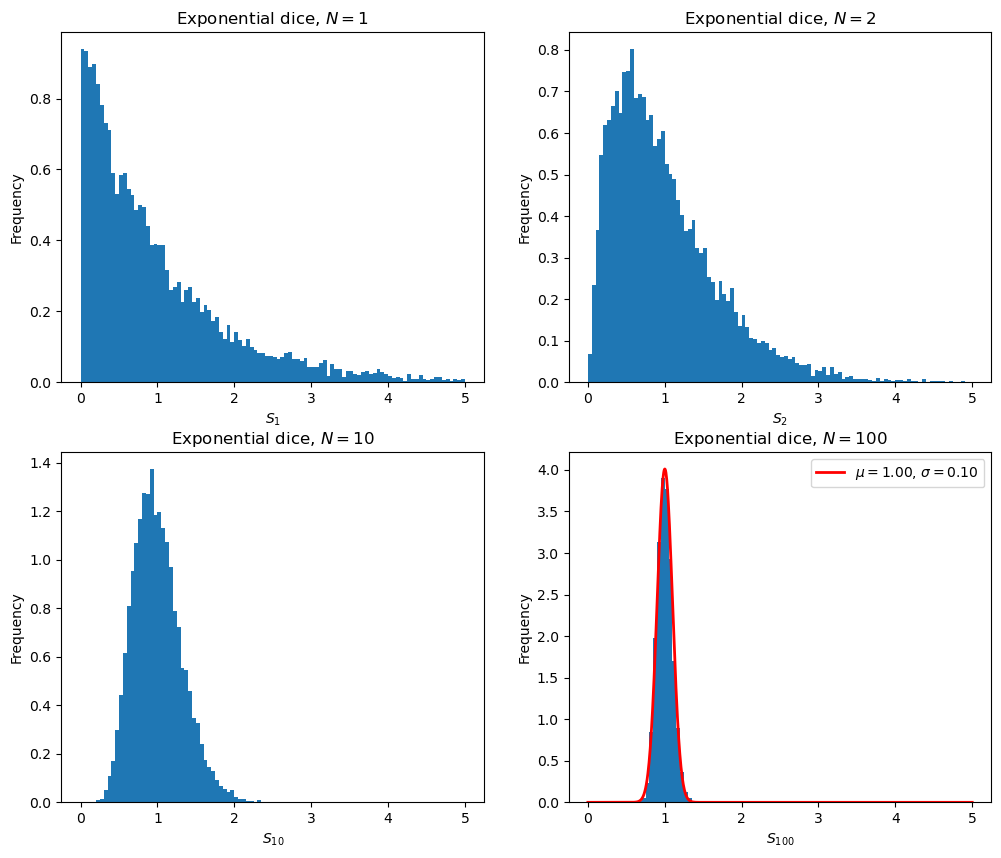

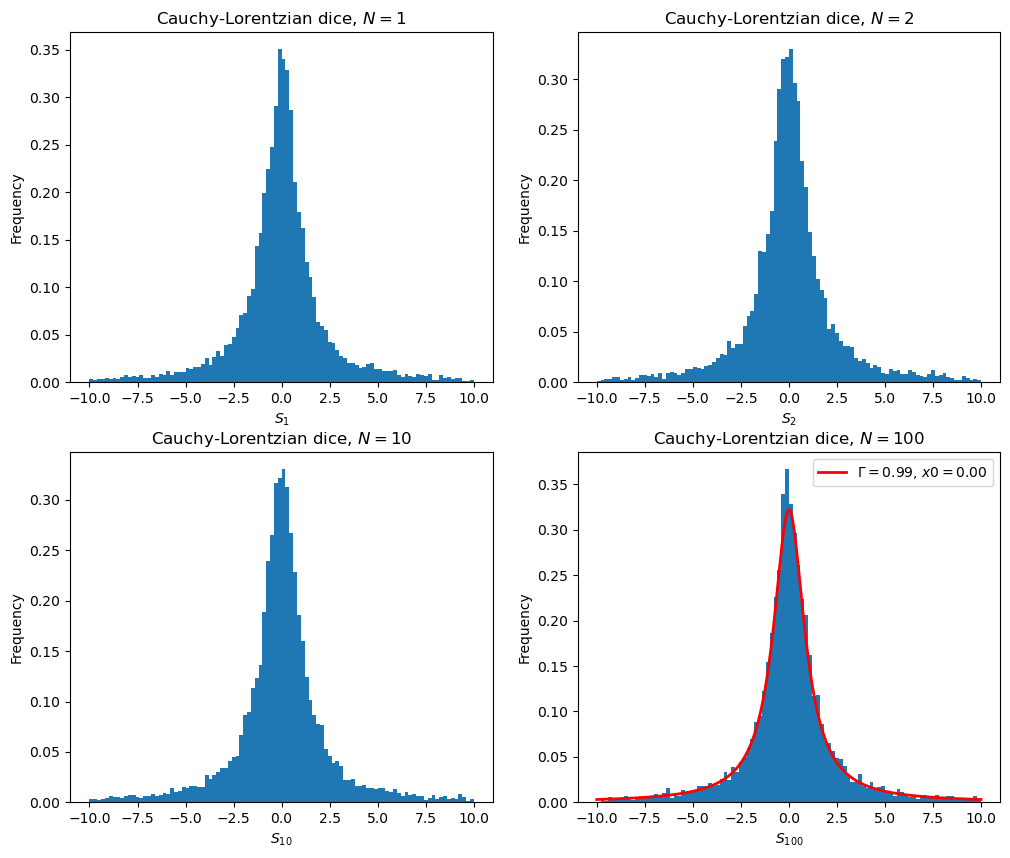

In [77]:
sumsize = [1, 2, 10, 100]    
name = [
    "Uniform dice",
    "Exponential dice",
    "Cauchy-Lorentzian dice"
]

unif_s1, expo_s1, cauchy_s1         = np.loadtxt("../data/ex01_2s_1.dat", unpack=True, usecols=(0,1,2))
unif_s2, expo_s2, cauchy_s2         = np.loadtxt("../data/ex01_2s_2.dat", unpack=True, usecols=(0,1,2))
unif_s10, expo_s10, cauchy_s10      = np.loadtxt("../data/ex01_2s_10.dat", unpack=True, usecols=(0,1,2))
unif_s100, expo_s100, cauchy_s100   = np.loadtxt("../data/ex01_2s_100.dat", unpack=True, usecols=(0,1,2))

unif = [unif_s1, unif_s2, unif_s10, unif_s100]

data = [
    [unif_s1, unif_s2, unif_s10, unif_s100],
    [expo_s1, expo_s2, expo_s10, expo_s100],
    [cauchy_s1, cauchy_s2, cauchy_s10, cauchy_s100]
]

limits = [
    (0,1),
    (0,5),
    (-10,10)
]

def gauss(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

def cauchylorentz(x, gamma, x0):
    return cauchy.pdf(x, x0, gamma)

def fit_gauss(data, dist):
    mu, sigma = norm.fit(data)
    x = np.linspace(limits[dist][0], limits[dist][1], 1000)
    y = gauss(x, mu, sigma)
    return x, y, mu, sigma

def fit_cauchy(data, dist):
    x0, gamma = cauchy.fit(data)
    # popt, pcov = curve_fit(cauchy, data)
    x = np.linspace(limits[dist][0], limits[dist][1], 1000)
    y = cauchylorentz(x, gamma, x0)
    return x, y, x0, gamma


n_bins = 100

for dist in range(3):
    plt.figure(figsize = (12,10))
    for sum in range(4):
        plt.subplot(2,2,sum+1)
        m = plt.hist(data[dist][sum], n_bins, range=limits[dist], density=True)
        if sum == 3:
            if dist != 2:
                x, y, mu, sigma = fit_gauss(data[dist][sum], dist)
                title = r"$\mu={mu:.2f}$, $\sigma={sigma:.2f}$".format(mu=mu, sigma=sigma)
                plt.plot(x, y, 'r', label=title, linewidth=2)
                plt.legend()
            if dist == 2:
                x, y, x0, gamma = fit_cauchy(cauchy_s100, dist)
                title = r"$\Gamma={gamma:.2f}$, $x0={x0:.2f}$".format(gamma=gamma, x0=x0)
                plt.plot(x, y, 'r', label=title, linewidth=2)
                plt.legend()
        plt.title(r"{name}, $N={size}$".format(name=name[dist], size=sumsize[sum]))
        plt.xlabel(r"$S_{%d}$" % sumsize[sum])
        plt.ylabel("Frequency")
    plt.show()




## Exercise 01.3

#### Assignment
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

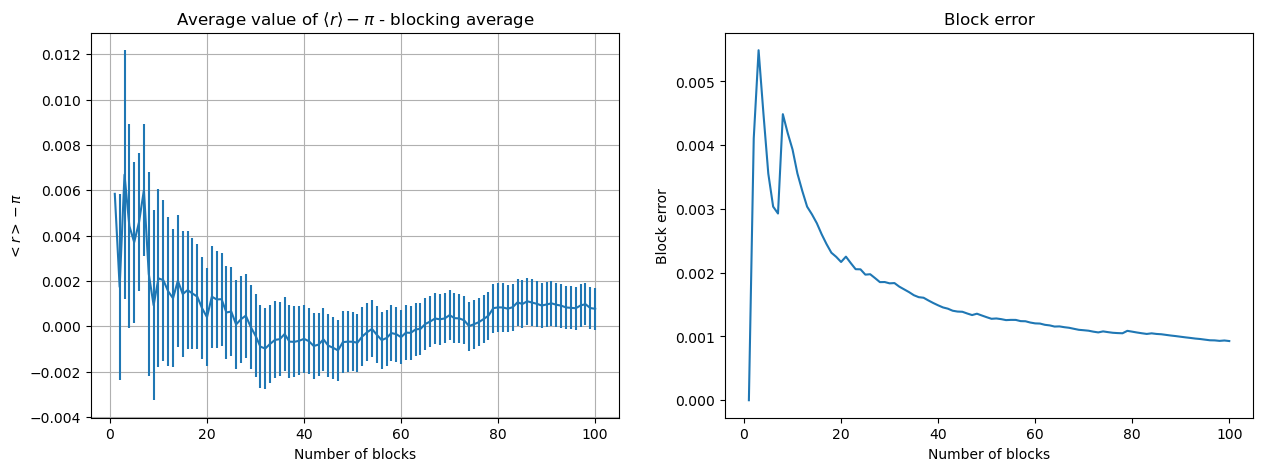

In [ ]:

n_throws, cum_avg, block_error = np.loadtxt("../data/ex01_3.dat", unpack=True, usecols=(0,1,2))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.errorbar(n_throws, cum_avg-np.pi, yerr=block_error)
plt.title(r"Average value of $\langle r \rangle - \pi$ - blocking average")
plt.xlabel('Number of blocks')
plt.ylabel(r"$<r> - \pi$")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(n_throws, block_error)
plt.title("Block error")
plt.xlabel('Number of blocks')
plt.ylabel('Block error')

plt.show()

